# Hand grip strength dataset  

### Description

Hand grip strength (HGS) is an effective marker of general health in middle age and older adulthood. Grip strength is measured by squeezing a type of muscle strength testing equipment, known as a dynamometer.

### Introduction

HGS is a measure of the maximum force that an individual can exert with their hand. It is a widely used measure of muscular strength. HGS is an easy and quick measure to obtain.

In a clinical setting, HGS is often used as a measure to assess changes in muscle strength over time. For example, in patients with conditions such as osteoarthritis, rheumatoid arthritis, or sarcopenia. Additionally, HGS can be used to assess the effectiveness of rehabilitation programs, such as those used to recover from a stroke or from other neurological conditions.

HGS is also used in research studies to investigate the relationship between muscle strength and various health outcomes, such as cardiovascular disease (CVD), respiratory function, and mortality. Studies have shown that low HGS is associated with increased risk of these and other health conditions, highlighting the importance of this measure in identifying individuals at risk for these conditions. Low HGS can be a warning sign of frailty, especially in older adults, as well as muscle wasting and weakness. Based on this, HGS can be used as a simple, non-invasive, and inexpensive method to predict physical frailty and disability.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
HGS is measured using a Jamar Hydraulic Hand Dynamometer (see figure below). The measurement is a measure of the static force (without movement) that the hand can exert when squeezing around the dynamometer. The measurement is recorded in pounds initially, and then converted to kilograms.

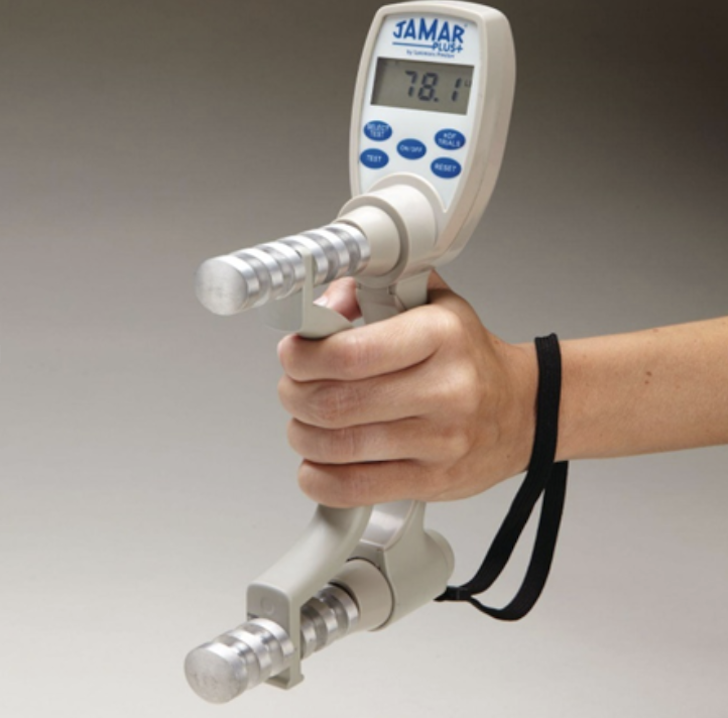

The participant is asked to sit upright in a chair with the arm bent at a 90° angle so that their forearm is pointing forward, with their thumb uppermost. The participant is asked to hold the device first in their dominant hand and adjust the handle of the dynamometer as necessary, ensuring the base rests on the first metacarpal and the handle on the middle of the four fingers. The participant is asked to squeeze the handle of the dynamometer for at least 3 seconds. The results are manually recorded, and then the measurement is repeated for the non-dominant hand.


### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `hand_grip.parquet`

### Relevant links

* Pheno Knowledgebase: https://knowledgebase.pheno.ai/datasets/006-hand_grip.html
* Pheno Data Browser: https://pheno-demo-app.vercel.app/folder/6


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('hand_grip')
pl

PhenoLoader for hand_grip with
10 fields
2 tables: ['hand_grip', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),6,hand_grip,Date,Collection time,NaN,Single,datetime64[ns],NaN,hand_grip/hand_grip.parquet,Time,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,NaN
collection_timestamp,Collection timestamp,Collection timestamp,6,hand_grip,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,hand_grip/hand_grip.parquet,Time,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,2019-11-13
finger_grip_strength_left,Finger grip strength (left),Finger grip strength (left),6,hand_grip,Continuous,Primary,NaN,Single,float,NaN,hand_grip/hand_grip.parquet,kg,NaN,NaN,NaN,NaN,Complete,Both sexes,2018-10-18,2019-11-13
finger_grip_strength_right,Finger grip strength (right),Finger grip strength (right),6,hand_grip,Continuous,Primary,NaN,Single,float,NaN,hand_grip/hand_grip.parquet,kg,NaN,NaN,NaN,NaN,Complete,Both sexes,2018-10-18,NaN
dominant_hand,Dominant hand,Hand preference for fine motor tasks,6,hand_grip,Categorical (single),Primary,007_01,Single,category,NaN,hand_grip/hand_grip.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,NaN
hand_grip_strength_left,Hand grip strength (left),Hand grip strength (left),6,hand_grip,Continuous,Primary,NaN,Single,float,NaN,hand_grip/hand_grip.parquet,kg,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,NaN
hand_grip_strength_right,Hand grip strength (right),Hand grip strength (right),6,hand_grip,Continuous,Primary,NaN,Single,float,NaN,hand_grip/hand_grip.parquet,kg,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,NaN
timezone,Timezone,Timezone,6,hand_grip,Categorical (single),Collection time,NaN,Single,string,NaN,hand_grip/hand_grip.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2018-10-18,NaN


# Plot histogram and ecdf for hand_grip_strength_left at baseline visit


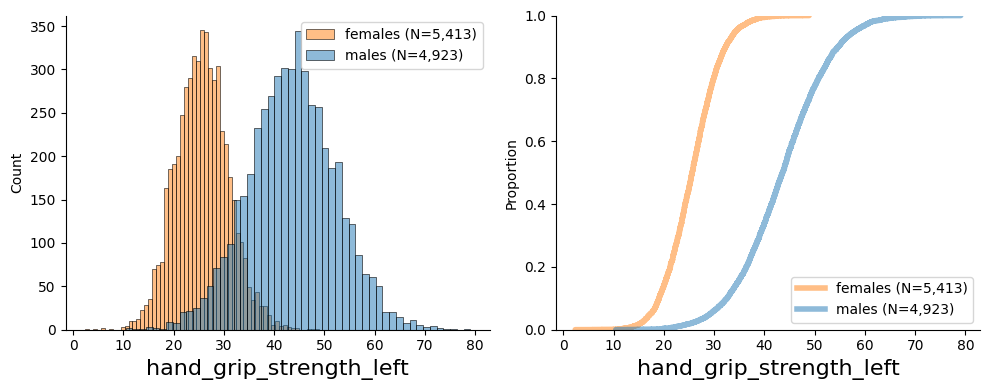

,count,mean,std,min,25%,50%,75%,max
hand_grip_strength_left,10336.0,34.177962,11.432727,2.358683,25.083688,31.638105,43.091326,79.061244


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "hand_grip_strength_left"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)